In [6]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
import numpy as np
import random
import matplotlib.pyplot as plt

In [8]:
import os
os.environ['CUDA _VISIBLE DEVICES'] ='-1'

In [9]:
x_train = np.loadtxt('input.csv',delimiter =',' , usecols=range(23316))
y_train = np.loadtxt ('labels.csv',delimiter =',' , usecols=range(23316))

ValueError: ignored

In [10]:
x_test = np.loadtxt('input_test.csv', delimiter =',')
y_test = np.loadtxt('labels_test.csv', delimiter =',')

ValueError: ignored

In [11]:
x_train = x_train.reshape (len (x_train), 100, 100, 3)
y_train = y_train.reshape (len(y_train), 1)

ValueError: ignored

In [12]:
x_test = x_test . reshape(len(x_test),100, 100,3)
y_test = y_test. reshape (len(y_test), 1)

NameError: ignored

In [13]:
x_train = x_train/255.0
x_test=x_test/255.0

NameError: ignored

In [14]:
print("Shape of X_train:", x_train.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of X_train:", x_test.shape)
print("Shape of X_train:", y_test.shape)


Shape of X_train: (172, 23316)


NameError: ignored

TypeError: ignored

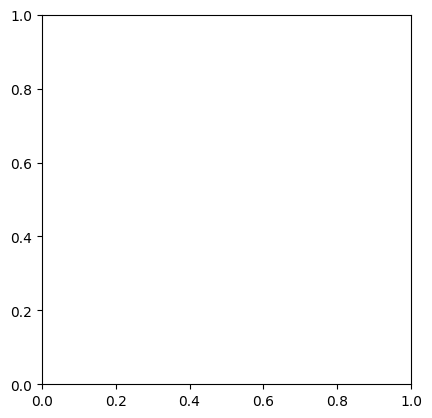

In [15]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [16]:
from tensorflow.keras.layers import BatchNormalization

In [17]:
model = Sequential([
        Conv2D(256, (3,3) , activation = 'relu', input_shape=(100, 100, 3)),
        BatchNormalization(),
        MaxPooling2D((4, 4)), Conv2D(128, (3,3), activation = 'relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation = 'relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])

In [18]:
opt = SGD(momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'])

In [20]:
model.fit(x_train,y_train,epochs=10,batch_size=32, validation_data=(x_test, y_test))

NameError: ignored

In [21]:
model.evaluate(x_test, y_test)

NameError: ignored

In [22]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test [idx2, :])
plt.show()


NameError: ignored

In [23]:
y_pred=model.predict(x_test[idx2,:].reshape(1, 100,100, 3))
y_pred = y_pred>0.5
if(y_pred==0):
  pred='dog'
else:
  pred='cat'
print("Our model says it is a",pred)

NameError: ignored

In [24]:
score=model.evaluate(x_test, y_test, verbose=0)
print ("Test Score: ", score[0])
print("Test accuracy: ", score[1])

NameError: ignored

In [25]:
model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 256)       7168      
                                                                 
 batch_normalization (Batch  (None, 98, 98, 256)       1024      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 128)       295040    
                                                                 
 batch_normalization_1 (Bat  (None, 22, 22, 128)       512       
 chNormalization)                                                
                                                        

In [26]:
val = model.fit(x_train,y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

NameError: ignored

NameError: ignored

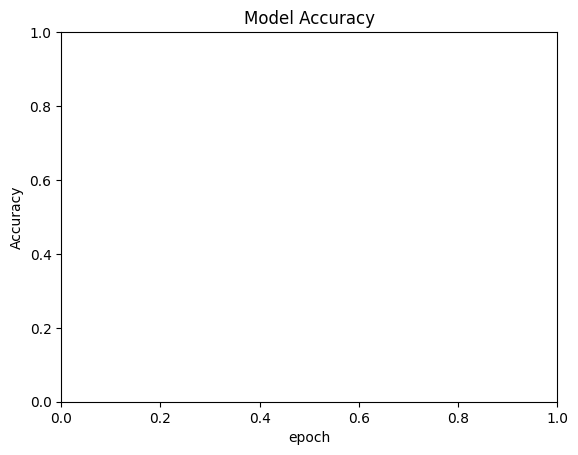

In [27]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('epoch')
plt.plot(val.history['accuracy'])
plt.plot(val.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.show()